In [ ]:
import plotnine
from plotnine import ggplot, aes
import pandas as pd

# data sources
from plotnine.data import mtcars
from vega_datasets import data as vds

# package for plot scales
from mizani.formatters import comma_format # (thousands seperator format)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pydataset

In [4]:
from pydataset import data as pyds

initiated datasets repo at: /root/.pydataset/


In [3]:
# data
stocks = vds.stocks()
stocks_MSFT = stocks[stocks['symbol'] == 'MSFT']
stocks_AMZN = stocks[stocks['symbol'] == 'AMZN']
stocks_IBM = stocks[stocks['symbol'] == 'IBM']
stocks_GOOG = stocks[stocks['symbol'] == 'GOOG']
stocks_AAPL = stocks[stocks['symbol'] == 'AAPL']
stocks.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


In [5]:
stocks.symbol.unique()

array(['MSFT', 'AMZN', 'IBM', 'GOOG', 'AAPL'], dtype=object)

# creando variables de media, media movil

In [6]:
stocks['media'] = stocks.groupby('symbol')['price'].transform('mean')
stocks.head()

,symbol,date,price,media
0,MSFT,2000-01-01,39.81,24.736748
1,MSFT,2000-02-01,36.35,24.736748
2,MSFT,2000-03-01,43.22,24.736748
3,MSFT,2000-04-01,28.37,24.736748
4,MSFT,2000-05-01,25.45,24.736748


In [7]:
stocks['MA_6'] = stocks.groupby('symbol')['price'].rolling(6).mean().reset_index(level=0,drop=True).shift(-2)
stocks.head(10)

,symbol,date,price,media,MA_6
0,MSFT,2000-01-01,39.81,24.736748,NaN
1,MSFT,2000-02-01,36.35,24.736748,NaN
2,MSFT,2000-03-01,43.22,24.736748,NaN
3,MSFT,2000-04-01,28.37,24.736748,34.290000
4,MSFT,2000-05-01,25.45,24.736748,32.388333
5,MSFT,2000-06-01,32.54,24.736748,31.063333
6,MSFT,2000-07-01,28.40,24.736748,27.948333
7,MSFT,2000-08-01,28.40,24.736748,27.890000
8,MSFT,2000-09-01,24.53,24.736748,27.538333
9,MSFT,2000-10-01,28.02,24.736748,25.056667


In [8]:
stocks_MSFT.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


Data MSFT

In [9]:
# elimino la columna symbol

del stocks_MSFT['symbol']
stocks_MSFT.head()

,date,price
0,2000-01-01,39.81
1,2000-02-01,36.35
2,2000-03-01,43.22
3,2000-04-01,28.37
4,2000-05-01,25.45


In [13]:
stocks_MSFT['MA_6'] = stocks_MSFT['price'].rolling(6).mean().shift(-2)
stocks_MSFT['MA_12'] = stocks_MSFT['price'].rolling(12).mean().shift(-5)
stocks_MSFT.head(20)

,date,price,MA_6,MA_12
0,2000-01-01,39.81,NaN,NaN
1,2000-02-01,36.35,NaN,NaN
2,2000-03-01,43.22,NaN,NaN
3,2000-04-01,28.37,34.290000,NaN
4,2000-05-01,25.45,32.388333,NaN
5,2000-06-01,32.54,31.063333,NaN
6,2000-07-01,28.40,27.948333,29.673333
7,2000-08-01,28.40,27.890000,28.425833
8,2000-09-01,24.53,27.538333,27.396667
9,2000-10-01,28.02,25.056667,25.649167


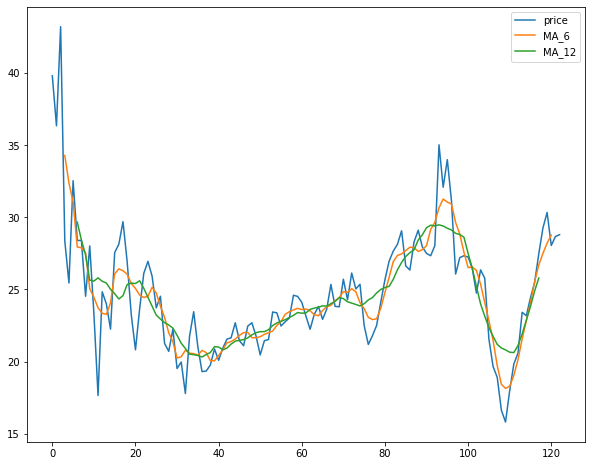

In [14]:
stocks_MSFT.iloc[:,1:].plot(figsize=(10,8))

In [15]:
from plotnine.themes.elements import element_text
from plotnine.themes import theme
from plotnine.geoms import geom_smooth

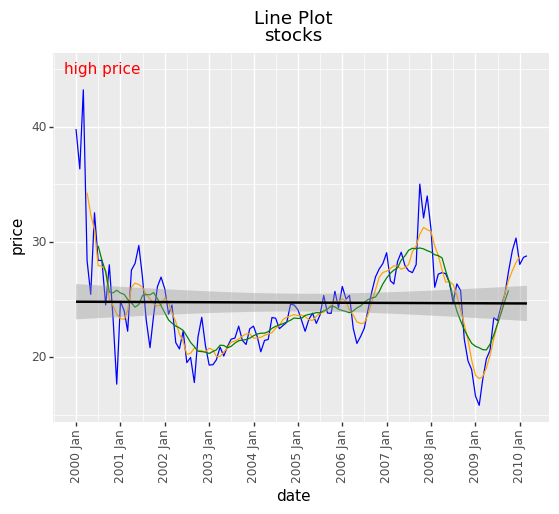

In [18]:

# create new ggplot object
# aes (aesthetics)
line_plot = ggplot(data=stocks_MSFT, mapping=aes(x='date', y='price'))

(line_plot + 
 plotnine.geom_line(color='blue') + 
 plotnine.geom_line(aes('date','MA_6'),color ='orange') +
 plotnine.geom_line(aes('date','MA_12'),color ='green') +
 plotnine.labs(title='Line Plot\nstocks') +
 plotnine.geom_smooth(method ='lm')+
 plotnine.theme(axis_text_x= element_text(angle=90),legend_position='bottom') +
 plotnine.scale_x_date(date_labels ='%Y %b',breaks ='1 years') +
 plotnine.annotate('text', x=pd.Timestamp('2000-08-01'), y=45, label='high price', color='red')).draw();

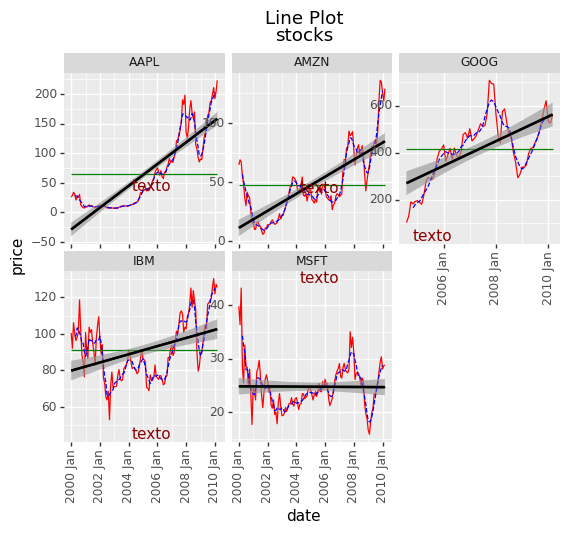

In [17]:

# create new ggplot object
# aes (aesthetics)
line_plot = ggplot(data=stocks, mapping=aes(x='date', y='price'))

# add layers
# draw() not needed
(line_plot + 
 plotnine.geom_line(color='red') + 
 plotnine.geom_smooth(method ='lm') + # tendencia
 plotnine.geom_line(aes(x='date',y='media'),color ='green') +  # media
 plotnine.geom_line(aes(x='date',y='MA_6'),color ='blue',linetype = "dashed") + # media movil
 plotnine.facet_wrap('symbol',scales='free') +
 plotnine.geom_smooth(method = 'lm') +
 plotnine.theme(axis_text_x= element_text(angle=90)) +
 plotnine.scale_x_date(date_labels ='%Y %b',breaks ='2 years') +
 # labels
 
 plotnine.labs(title='Line Plot\nstocks') +

 # add annotation to plot
 plotnine.annotate('text', x=pd.Timestamp('2005-08-01'), y=45, label='texto', color='darkred')).draw();

# Plot con seaborn

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

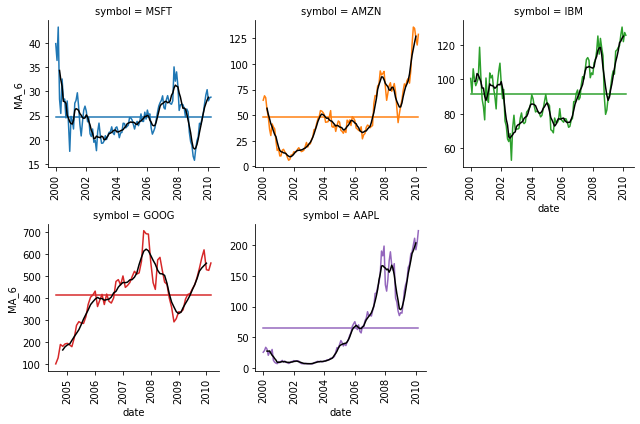

In [20]:
g = sns.FacetGrid(stocks, col="symbol"
                     ,col_wrap =3
                      ,sharey=False
                      ,sharex=False
                  ,hue = 'symbol' )
g.map(sns.lineplot, 'date', "price")
g.map(sns.lineplot, "date", "media")
g.map(sns.lineplot, "date", "MA_6",color ='k')

# esta parte hace la rotación por cada plot

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

SExpMA

In [21]:
# EWMA Exp weighted MA (w = 12)

stocks_MSFT['EWMA12'] = stocks_MSFT['price'].ewm(span=12,adjust=False).mean()

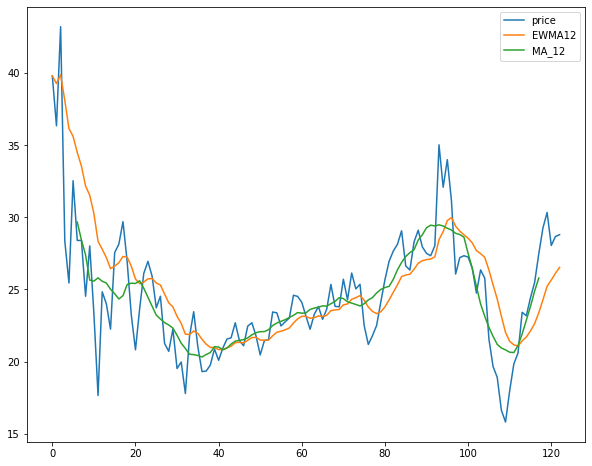

In [22]:
stocks_MSFT.loc[:,['price','EWMA12','MA_12']].plot(figsize=(10,8))

In [23]:
stocks_MSFT.head()

,date,price,MA_6,MA_12,EWMA12
0,2000-01-01,39.81,NaN,NaN,39.810000
1,2000-02-01,36.35,NaN,NaN,39.277692
2,2000-03-01,43.22,NaN,NaN,39.884201
3,2000-04-01,28.37,34.290000,NaN,38.112786
4,2000-05-01,25.45,32.388333,NaN,36.164665
